In [1]:
%matplotlib widget

import inspect
import re
def debugPrint(x):
    frame = inspect.currentframe().f_back
    s = inspect.getframeinfo(frame).code_context[0]
    r = re.search(r"\((.*)\)", s).group(1)
    print("{} [{}] = {}".format(r,type(x).__name__, x))
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import TqdmExperimentalWarning
import warnings
warnings.filterwarnings(action='once')
warnings.filterwarnings("ignore", category=TqdmExperimentalWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import torch
import matplotlib.patches as patches
import math
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib


# neighborSearch, neighborSearchFixed
# from torchCompactRadius.util import volumeToSupport
# from torchCompactRadius.neighborhood import neighborSearch

In [2]:
import torchCompactRadius as tcr
from torchCompactRadius import neighborSearch
from torchCompactRadius.util import volumeToSupport

In [27]:
import platform
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
if platform.system() == 'Darwin':
    device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
device = torch.device('cpu')
targetNumNeighbors = 50
hashMapLength = 4096
nx = 32
dim = 2

minDomain = torch.tensor([-1] * dim, dtype = torch.float32, device = device)
maxDomain = torch.tensor([ 1] * dim, dtype = torch.float32, device = device)
maxDomain[0] = 2
periodicity = [True] * dim

extent = maxDomain - minDomain
shortExtent = torch.min(extent, dim = 0)[0].item()
dx = (shortExtent / nx)
ny = int(1 // dx)
h = volumeToSupport(dx**dim, 50, dim)
dy = dx

In [28]:
positions = []
for d in range(dim):
    positions.append(torch.linspace(minDomain[d] + dx / 2, maxDomain[d] - dx / 2, int((extent[d] - dx) / dx) + 1, device = device))
grid = torch.meshgrid(*positions, indexing = 'xy')
positions = torch.stack(grid, dim = -1).reshape(-1,dim).to(device)
# enable for random positions for alternative debugging
# positions = (torch.rand(nx**dim, dim) * 2 - 1).to(device)

supports = torch.ones(positions.shape[0], device = device) * h

In [29]:
xpos2 = torch.linspace(-0.5 + dy / 2, 0.5 - dy / 2, ny)
ypos2 = torch.linspace(-0.5 + dy / 2, 0.5 - dy / 2, ny)
xpos2, ypos2 = torch.meshgrid(xpos2, ypos2, indexing = 'xy')
y = torch.stack((xpos2.flatten(), ypos2.flatten()), dim = 1).to(device)
# y = torch.clone(positions)
ySupport = torch.ones(y.shape[0], device = device) * supports[0]

In [30]:
# (i_cpu, j_cpu), ni_cpu, nj_cpu, *_ = neighborSearch((positions, y), (supports, ySupport), (minDomain, maxDomain), periodicity, hashMapLength, 'symmetric', 'python')
# (i_cpu, j_cpu), ni_cpu, nj_cpu, *_ = neighborSearch((positions, y), h, (minDomain, maxDomain), periodicity, hashMapLength, 'symmetric', 'python')

# (i_cpu, j_cpu), ni_cpu, nj_cpu, *_ = neighborSearch((positions, y), (supports, ySupport), (minDomain, maxDomain), periodicity, hashMapLength, 'symmetric', 'pythonDynamic')
# (i_cpu, j_cpu), ni_cpu, nj_cpu, *_ = neighborSearch((positions, y), h, (minDomain, maxDomain), periodicity, hashMapLength, 'symmetric', 'pythonDynamic')

In [31]:
# sortedPositions, sortedSupports, hashTable, sortedCellTable, hCell, qMin, qMax, numCells, sortIndex = _

In [32]:
# (i_cpu, j_cpu), ni_cpu, nj_cpu, *_ = tcr.neighborSearch((positions, y), (supports, ySupport), (minDomain, maxDomain), periodicity, hashMapLength, 'symmetric', 'cpp')
# (i_cpu, j_cpu), ni_cpu, nj_cpu, *_ = tcr.neighborSearch((positions, y), h, (minDomain, maxDomain), periodicity, hashMapLength, 'symmetric', 'cpp')
# (i_cpu, j_cpu), ni_cpu, nj_cpu, *_ = tcr.neighborSearch(positions, (supports, supports), (minDomain, maxDomain), periodicity, hashMapLength = hashMapLength, mode = 'symmetric', variant = 'cpp', verbose = False)
# (i_cpu, j_cpu), ni_cpu, nj_cpu, *_ = tcr.neighborSearch(positions, h, (minDomain, maxDomain), periodicity, hashMapLength = hashMapLength, mode = 'symmetric', variant = 'cpp')
# (i_cpu, j_cpu), ni_cpu, nj_cpu, *_ = tcr.neighborSearch(positions, (supports, supports), (minDomain, maxDomain), hashMapLength = hashMapLength, mode = 'symmetric', variant = 'cpp', verbose = False)
# (i_cpu, j_cpu), ni_cpu, nj_cpu, *_ = tcr.neighborSearch(positions, h, (minDomain, maxDomain), hashMapLength = hashMapLength, mode = 'symmetric', variant = 'cpp')
# (i_cpu, j_cpu), ni_cpu, nj_cpu, *_ = tcr.neighborSearch(positions, (supports, supports), hashMapLength = hashMapLength, mode = 'symmetric', variant = 'cpp', verbose = False)
# (i_cpu, j_cpu), ni_cpu, nj_cpu, *_ = tcr.neighborSearch(positions, h, hashMapLength = hashMapLength, mode = 'symmetric', variant = 'cpp')

In [33]:
(i_cpu, j_cpu), ni_cpu, nj_cpu, sortedPositions, sortedSupports, hashTable, sortedCellTable, hCell, qMin, qMax, numCells, sortIndex = \
     neighborSearch((y, positions), (ySupport, supports), (minDomain, maxDomain), periodicity, hashMapLength, 'symmetric', 'cpp')

What is going on here?
Current device: cpu


In [26]:
print('i_cpu', i_cpu.device, i_cpu.dtype, i_cpu.shape, i_cpu)
print('j_cpu', j_cpu.device, j_cpu.dtype, j_cpu.shape, j_cpu)
print('ni_cpu', ni_cpu.device, ni_cpu.dtype, ni_cpu.shape, ni_cpu)
print('nj_cpu', nj_cpu.device, nj_cpu.dtype, nj_cpu.shape, nj_cpu)
print('sortedPositions', sortedPositions.device, sortedPositions.dtype, sortedPositions.shape, sortedPositions)
print('sortedSupports', sortedSupports.device, sortedSupports.dtype, sortedSupports.shape, sortedSupports)
print('hashTable', hashTable.device, hashTable.dtype, hashTable.shape, hashTable)
print('sortedCellTable', sortedCellTable.device, sortedCellTable.dtype, sortedCellTable.shape, sortedCellTable)
print('qMin', qMin.device, qMin.dtype, qMin.shape, qMin)
print('qMax', qMax.device, qMax.dtype, qMax.shape, qMax)
print('numCells', numCells.device, numCells.dtype, numCells.shape, numCells)
print('sortIndex', sortIndex.device, sortIndex.dtype, sortIndex.shape, sortIndex)


i_cpu mps:0 torch.int64 torch.Size([0]) tensor([], device='mps:0', dtype=torch.int64)
j_cpu mps:0 torch.int64 torch.Size([0]) tensor([], device='mps:0', dtype=torch.int64)
ni_cpu mps:0 torch.int64 torch.Size([256]) tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [22]:
# (i_cpu, j_cpu), ni_cpu, nj_cpu, sortedPositions, sortedSupports, hashTable, sortedCellTable, hCell, qMin, qMax, numCells, sortIndex = \
#     neighborSearch_cpp(y, ySupport, positions, supports, minDomain, maxDomain, periodicity, hashMapLength = hashMapLength)

# (i_cpu, j_cpu), ni_cpu, nj_cpu, sortedPositions, hashTable, sortedCellTable, hCell, qMin, qMax, numCells, sortIndex = \
#     neighborSearchFixed_cpp(y, positions, h, minDomain, maxDomain, periodicity, hashMapLength = hashMapLength)

# (i_cpu, j_cpu), ni_cpu, nj_cpu, sortedPositions, sortedSupports, hashTable, sortedCellTable, hCell, qMin, qMax, numCells, sortIndex = \
#     neighborSearch(y, ySupport, positions, supports, minDomain, maxDomain, periodicity, hashMapLength = hashMapLength)

# (i_cpu, j_cpu), ni_cpu, nj_cpu, sortedPositions, hashTable, sortedCellTable, hCell, qMin, qMax, numCells, sortIndex = \
    # neighborSearchFixed(y, positions, h, minDomain, maxDomain, periodicity, hashMapLength = hashMapLength)

# (i_cpu, j_cpu), ni_cpu, nj_cpu, sortedPositions, sortedSupports, hashTable, sortedCellTable, hCell, qMin, qMax, numCells, sortIndex = \
    # neighborSearchDynamic(y, ySupport, positions, supports, minDomain, maxDomain, periodicity, hashMapLength = hashMapLength)

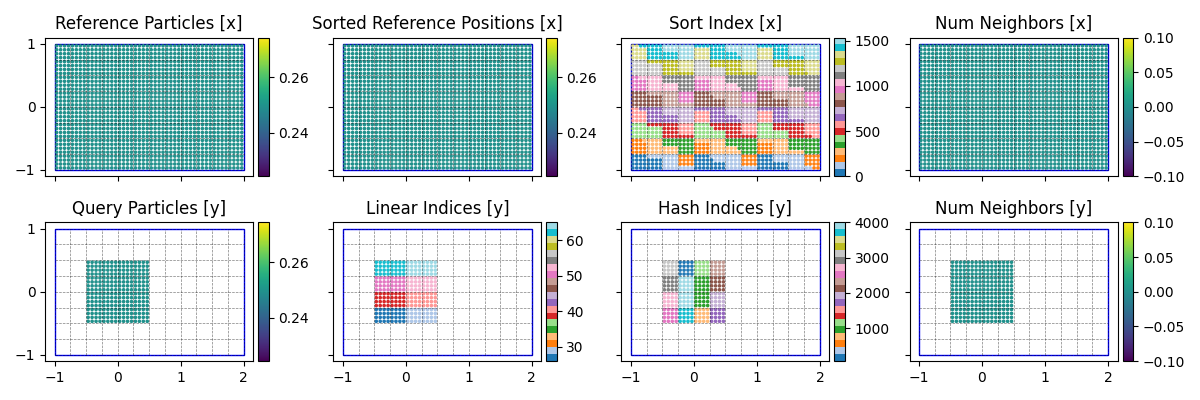

In [25]:
def plotGrid(ax, qMin, qMax, hCell, numCells):
    ax.add_patch(patches.Rectangle((qMin[0].detach().cpu(), qMin[1].detach().cpu()), (qMax[0] - qMin[0]).detach().cpu(), (qMax[1] - qMin[1]).detach().cpu(), fill=False, edgecolor='b', linewidth = 1))
    for i in range(numCells[0].detach().cpu() + 1):
        ax.vlines(x = qMin[0].detach().cpu() + i * hCell, ymin = qMin[1].detach().cpu(), ymax = qMax[1].detach().cpu(), color = 'black', linestyle = '--', alpha = 0.5, lw = 0.5)
    for i in range(numCells[1].detach().cpu() + 1): 
        ax.hlines(y = qMin[1].detach().cpu() + i * hCell, xmin = qMin[0].detach().cpu(), xmax = qMax[0].detach().cpu(), color = 'black', linestyle = '--', alpha = 0.5, lw = 0.5)
    ax.set_aspect(1, adjustable='box')

def scatterPlot(fig, ax, positions, c, scatterSize, title, cmap = 'viridis', norm = 'linear', midPoint = 0):
    if norm == 'log':
        dataNorm = matplotlib.colors.LogNorm(vmin = c.min(), vmax = c.max())
    elif norm == 'sym':
        dataNorm = matplotlib.colors.Normalize(vmin = midPoint - (midPoint - c).abs().max(), vmax = midPoint + (midPoint - c).abs().max())
    else:
        dataNorm = matplotlib.colors.Normalize(vmin = c.min(), vmax = c.max())

    sc = ax.scatter(positions[:,0].detach().cpu(), positions[:,1].detach().cpu(), c = c.detach().cpu(), s = scatterSize, label = title, cmap = cmap, norm = dataNorm)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)    
    plt.colorbar(sc, cax=cax)
    ax.set_title(title)


fig, axis = plt.subplots(2, 4, figsize=(12,4), sharex = True, sharey = True, squeeze = False)

for ax in axis.flatten():
    plotGrid(ax, qMin, qMax, hCell, numCells)
scatterSize = 100 / math.sqrt(positions.shape[0])

scatterPlot(fig, axis[0,0], positions, supports, scatterSize, 'Reference Particles [x]')
scatterPlot(fig, axis[0,1], sortedPositions, sortedSupports, scatterSize, 'Sorted Reference Positions [x]')
scatterPlot(fig, axis[1,0], y, ySupport, scatterSize, 'Query Particles [y]')

scatterPlot(fig, axis[0,2], positions, sortIndex, scatterSize, 'Sort Index [x]', cmap = 'tab20', norm = 'linear')

from torchCompactRadius.util import linearIndexing, hashCellIndices

cellIndices = torch.floor((y - qMin) / hCell).to(torch.int32)
linearIndices = linearIndexing(cellIndices, numCells)
hashIndices = hashCellIndices(cellIndices, hashMapLength)
scatterPlot(fig, axis[1,1], y, linearIndices, scatterSize, 'Linear Indices [y]', cmap = 'tab20', norm = 'linear')
scatterPlot(fig, axis[1,2], y, hashIndices, scatterSize, 'Hash Indices [y]', cmap = 'tab20', norm = 'linear')

scatterPlot(fig, axis[0,3], positions, nj_cpu, scatterSize, 'Num Neighbors [x]')
scatterPlot(fig, axis[1,3], y, ni_cpu, scatterSize, 'Num Neighbors [y]')

fig.tight_layout()